[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PyMPDATA/blob/main/examples/PyMPDATA_examples/Arabas_and_Farhat_2020/fig_1.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PyMPDATA.git/main?urlpath=lab/tree/examples/PyMPDATA_examples/Arabas_and_Farhat_2020/fig_1.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PyMPDATA/blob/main/examples/PyMPDATA_examples/Arabas_and_Farhat_2020/fig_1.ipynb)

license: GPL v3   
authors: Sylwester Arabas, Michael Olesik, Piotr Bartman   
copyright: Jagiellonian University   
based on Fig. 1 from [Arabas & Farhat 2020](https://doi.org/10.1016/j.cam.2019.05.023)

In [1]:
import sys

import matplotlib.pyplot as plt

if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PyMPDATA-examples')

In [1]:
import os
os.environ["NUMBA_DISABLE_JIT"] = "1"

In [2]:
import numpy as np
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot
from PyMPDATA_examples.asian_option.simulation import Simulation
from PyMPDATA_examples.asian_option.setup3_asian_option import Settings
# from PyMPDATA_examples.asian_option.setup1_european_corridor import Settings
from PyMPDATA_examples.asian_option.colors import colors

In [3]:
# vel_a = 0.1
# vel_x = 2
# x_steps = 21
# a_steps = 20
# A = np.linspace(0, 10, a_steps)
# X = np.linspace(0, 10, x_steps)
# X, A = np.meshgrid(X, A)
# fig, ax = pyplot.subplots()
# # ax.quiver(X, A, vel_x, vel_a, color='red', label='vector-field values at cell centers')
# ax.quiver(X, A, vel_x, 0, color='green', label='vector-field x-component values at cell walls')
# ax.quiver(X, A, 0, vel_a, color='blue', label='vector-field a-component values at cell walls')
# ax.set_xlabel("underlying asset price")
# ax.set_ylabel("time-to-maturity")
# ax.set_title("vector-field values at cell walls")
# # ax.legend()
# show_plot()


In [4]:
settings = Settings()
simulation = Simulation(settings)

self.S.shape=(40,), self.A.shape=(42,)
self.S_mesh.shape=(42, 40), self.A_mesh.shape=(42, 40)
x_dim_advector.shape=(42, 41) a_dim_advector.shape=(43, 40)


In [5]:
simulation.solver.advectee.get()

array([[   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [  17.38866579,   17.38866579,   17.38866579, ...,   17.38866579,
          17.38866579,   17.38866579],
       ...,
       [2022.95934724, 2022.95934724, 2022.95934724, ..., 2022.95934724,
        2022.95934724, 2022.95934724],
       [2077.16396025, 2077.16396025, 2077.16396025, ..., 2077.16396025,
        2077.16396025, 2077.16396025],
       [2131.36857326, 2131.36857326, 2131.36857326, ..., 2131.36857326,
        2131.36857326, 2131.36857326]])

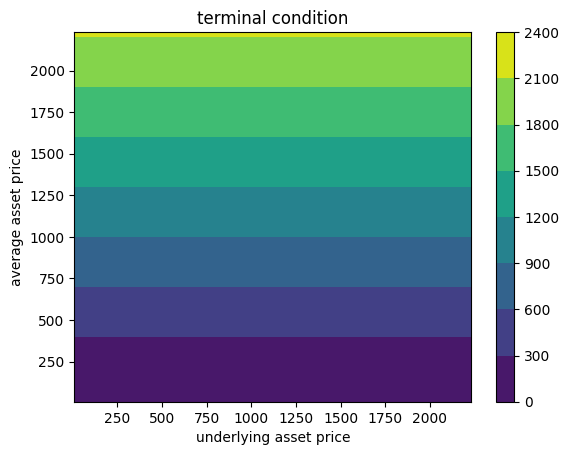

In [9]:
#do a 2d plot of the initial condition using the meshgrid and contourplot
fig, ax = pyplot.subplots()
CS = ax.contourf(simulation.S_mesh, simulation.A_mesh, simulation.solver.advectee.get())
fig.colorbar(CS, ax=ax)
ax.set_title("terminal condition")
ax.set_xlabel("underlying asset price")
ax.set_ylabel("average asset price")
pyplot.show()

In [10]:
# check for nan
advector = simulation.solver.advector

A.shape=(43, 40)
X.shape=(42, 41)
a_vals.shape=(42, 40)
x_vals.shape=(42, 40)


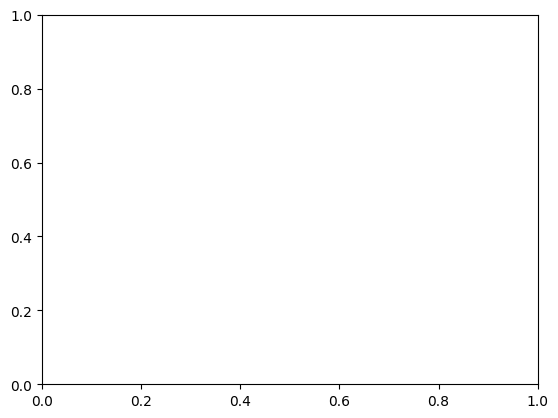

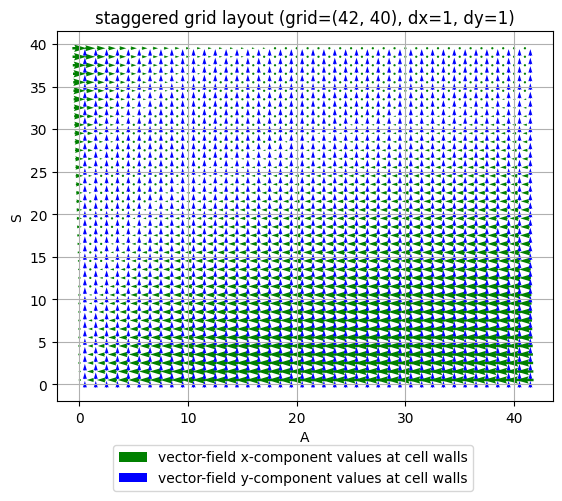

In [19]:
# do a contour plot of advector
A = advector.get_component(0)
X = advector.get_component(1)
print(f"{A.shape=}")
print(f"{X.shape=}")
fig, ax = pyplot.subplots()
a_vals = (A[1:, :] + A[0:-1, :])/2
x_vals = (X[:, 1:] + X[:, 0:-1])/2

print(f"{a_vals.shape=}")
print(f"{x_vals.shape=}")

# do a quiver plot based on the cell above
dx, dy = 1, 1
grid = (A.shape[0]-1, A.shape[1])
# grid = (15, 40)
fig, ax = pyplot.subplots()
ax.quiver(*np.mgrid[
        0 : (grid[0]) * dx : dx,
        dy / 2 : grid[1] * dy : dy
    ], a_vals.flatten(), 0, pivot='mid', color='green', width=.005,
    label='vector-field x-component values at cell walls'
)
ax.quiver(*np.mgrid[
        dx / 2 : grid[0] * dx : dx,
        0: (grid[1]) * dy : dy
    ], 0, x_vals.flatten(), pivot='mid', color='blue', width=.005,
    label='vector-field y-component values at cell walls'
)
# pyplot.xticks(np.linspace(0, grid[0]*dx, grid[0]+1))
# pyplot.yticks(np.linspace(0, grid[1]*dy, grid[1]+1))
pyplot.title(f'staggered grid layout (grid={grid}, dx={dx}, dy={dy})')
pyplot.xlabel('A')
pyplot.ylabel('S')
pyplot.legend(bbox_to_anchor=(.1, -.1), loc='upper left', ncol=1)
pyplot.grid()
# pyplot.savefig('readme_grid.png')






In [20]:
sol_at_t_0 = simulation.run(n_iters=2)

In [21]:
sol_at_t_0

array([[-2.42380394e+101,  2.67531881e+099,  7.21195147e+098, ...,
         3.76786030e+085,  9.61690884e+099, -4.92345833e+112],
       [-2.03007994e+099,  2.39370803e+099, -2.09781160e+096, ...,
         4.05556380e+087, -9.61690884e+099, -2.17265891e+100],
       [-4.98604129e+086,  2.77382240e+086, -8.33762258e+086, ...,
         2.52549396e+077, -5.39133485e+088, -6.43692795e+088],
       ...,
       [-4.61324812e+126,  3.67911249e+124, -8.51140416e+114, ...,
        -5.83609200e+099,  2.85204097e+103,  4.61324812e+126],
       [ 4.61324812e+126, -3.67911249e+124,  8.50810682e+114, ...,
         2.68139634e+100,  4.94115225e+112, -4.61324812e+126],
       [-4.80512593e+114,  2.23104910e+112, -1.68117142e+109, ...,
         5.60372180e+096, -4.92345833e+112, -4.92345833e+112]])

In [ ]:
settings = Settings()
simulation = Simulation(settings)

S = simulation.S
psi_T = simulation.solvers[2].advectee.get()
#do a 2d plot of the initial condition using the meshgrid and contourplot
fig, ax = pyplot.subplots()
CS = ax.contourf(simulation.S_mesh, simulation.A_mesh, psi_T)
fig.colorbar(CS, ax=ax)
ax.set_title("Initial condition")
ax.set_xlabel("average asset price")
ax.set_ylabel("underlying asset price")
pyplot.show()



psi_0 = simulation.run(n_iters=2)
# psi_a = settings.analytical_solution(S)
print(f"{psi_0=}")

self.S.shape=(40,), self.A.shape=(15,)
self.S_mesh.shape=(15, 40), self.A_mesh.shape=(15, 40)
x_dim_advector.shape=(15, 41) a_dim_advector.shape=(16, 40)
(array([[-0.00312992, -0.00360539, -0.00415308, -0.00478398, -0.00551071,
        -0.00634784, -0.00731214, -0.00842293, -0.00970245, -0.01117635,
        -0.01287415, -0.01482986, -0.01708267, -0.01967769, -0.02266693,
        -0.02611026, -0.03007667, -0.03464561, -0.03990862, -0.04597114,
        -0.05295461, -0.06099894, -0.07026528, -0.08093927, -0.09323475,
        -0.10739803, -0.12371286, -0.14250607, -0.16415415, -0.18909079,
        -0.21781556, -0.2509039 , -0.28901869, -0.33292349, -0.38349787,
        -0.441755  , -0.50886196, -0.58616314, -0.67520712, -0.77777778],
       [-0.00312992, -0.00360539, -0.00415308, -0.00478398, -0.00551071,
        -0.00634784, -0.00731214, -0.00842293, -0.00970245, -0.01117635,
        -0.01287415, -0.01482986, -0.01708267, -0.01967769, -0.02266693,
        -0.02611026, -0.03007667, -0.0346